#### Import libraries

In [1]:
import pandas as pd
import os

#### Merging yearly csv files into one file

In [2]:

files = [file for file in os.listdir("./Sales_Data")]

all_file_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_file_data = pd.concat([all_file_data,df])
    
all_file_data.to_csv("all_file_data.csv", index=False)

####  load in concatenated file containing all 12 files

In [3]:
df = pd.read_csv("all_file_data.csv")

#### Cleaning

#### Removing NaN values

In [4]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Removing other strange values

In [5]:
df = df[df["Order Date"].str[0:2] != "Or"]

#### Convert Column types to integers

In [6]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])


#### Create Month column using Order Date column

In [7]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### add a sales column, quantity ordered x price each

In [8]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### 1. What was the best month for sales? how much was earned?

In [9]:
results = df.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


#### Display results in graph using matplotlib

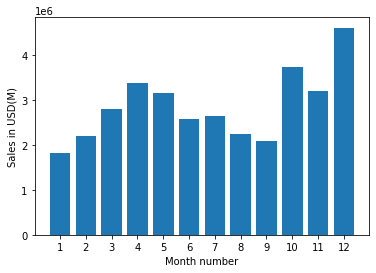

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD(M)")
plt.xlabel("Month number")
plt.show()


#### Add city column

In [22]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df["city"] = df["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))

df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### 2. What city had the highest number of sales?

In [24]:
results = df.groupby("city").sum()
results

,Quantity Ordered,Price Each,Month,Sales
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06
